# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Bayu Frassetyo Wibowo
- **Email:** bayufrassetyo@gmail.com
- **ID Dicoding:** bayufrassetyo

## Menentukan Pertanyaan Bisnis

- Produk apa saja yang menunjukkan performa penjualan terbaik dan terburuk di E-commerce?
- Bagaimana pola tren penjualan E-commerce selama periode waktu tertentu?
- Berapa jumlah pendapatan yang dihasilkan oleh E-commerce dalam periode beberapa bulan terakhir?
- Apa saja ulasan dan rating yang diberikan oleh pelanggan kepada E-commerce, dan bagaimana persebarannya?
- Bagaimana distribusi demografis pelanggan dan apakah ada variasi dalam preferensi pembelian di antara mereka?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import matplotlib.image as mpimg
import textwrap
import datetime as dt
import matplotlib

## Data Wrangling

### Gathering Data

In [2]:
import os

base_path = "E:/Dicoding/E-commerce-public-dataset/Dataset"

# Memuat data dari file CSV
customers_df = pd.read_csv(os.path.join(base_path, "customers_dataset.csv"))
geolocation_df = pd.read_csv(os.path.join(base_path, "geolocation_dataset.csv"))
order_items_df = pd.read_csv(os.path.join(base_path, "order_items_dataset.csv"))
order_payments_df = pd.read_csv(os.path.join(base_path, "order_payments_dataset.csv"))
order_reviews_df = pd.read_csv(os.path.join(base_path, "order_reviews_dataset.csv"))
orders_df = pd.read_csv(os.path.join(base_path, "orders_dataset.csv"))
products_df = pd.read_csv(os.path.join(base_path, "products_dataset.csv"))
product_category_name_translation_df = pd.read_csv(os.path.join(base_path, "product_category_name_translation.csv"))
sellers_df = pd.read_csv(os.path.join(base_path, "sellers_dataset.csv"))

In [3]:
# prompt: Menggunakan customers_df DataFrame: customers_df

# Display the dataframe
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
# prompt: Menggunakan geolocation_df

# Create a new DataFrame called geolocation_df from the customer data.
geolocation_df = customers_df[["customer_zip_code_prefix", "customer_city", "customer_state"]].copy()

# Display the first few rows of the new DataFrame.
geolocation_df.head()

,customer_zip_code_prefix,customer_city,customer_state
0,14409,franca,SP
1,9790,sao bernardo do campo,SP
2,1151,sao paulo,SP
3,8775,mogi das cruzes,SP
4,13056,campinas,SP


In [9]:
# prompt: Menggunakan order_items_df
order_items_df.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
# prompt: Menggunakan order_payments_df
order_payments_df.head()


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [11]:
# prompt: Menggunakan order_reviews_df
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [12]:
# prompt: Menggunakan orders_df

# Display the first 5 rows of the order_reviews dataframe.
orders_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [13]:
# prompt: Menggunakan products_df

# Kode ini akan menampilkan 5 baris pertama dari dataframe yang disediakan 'orders_df'.
# Ganti dengan operasi aktual pada 'products_df' setelah tersedia.

products_df.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [14]:
# prompt: Menggunakan product_category_name_translation_df

product_category_name_translation_df.head()


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [15]:
# prompt: Menggunakan sellers_df

# Untuk menampilkan bingkai data, gunakan:
sellers_df.head()


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Data pelanggan berhasil dimuat dengan baik, menunjukkan beberapa baris pertama untuk verifikasi.
- Data dari berbagai file CSV digabungkan untuk analisis lebih lanjut.
- Data ulasan memberikan wawasan tentang kepuasan pelanggan melalui rating dan komentar.
- Data pesanan mencakup detail seperti status, waktu pembelian, dan waktu pengiriman. Ini memungkinkan evaluasi efisiensi proses pemesanan dan pengiriman.
- Data produk dan kategorinya menyediakan informasi penting tentang atribut produk serta klasifikasinya.
- Data penjual memberikan detail lokasi penjual, membantu menganalisis distribusi geografis penjual.

### Assessing Data

1. Data customers_df

In [16]:
# prompt: customers_df.info()

customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Informasi Kolom dan Tipe Data:

- customers_df memiliki 99,441 baris dan 5 kolom.

- Kolom terdiri dari customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, dan customer_state.

- Kolom customer_zip_code_prefix bertipe int64 sementara kolom lainnya bertipe object.

In [17]:
# prompt: customers_df.isna().sum()

customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Missing Values:

- Tidak ada missing values di dalam dataset ini. Semua kolom terisi penuh dengan nilai yang valid.

In [18]:
# prompt: print("Jumlah duplikasi: ", customers_df.duplicated().sum())

print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


Duplikasi Data:

- Tidak ada duplikasi data ditemukan di dalam dataset ini (Jumlah duplikasi: 0).

In [19]:
# prompt: customers_df.describe(include=('all'))

customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Statistik Deskriptif:

- Kolom customer_zip_code_prefix menunjukkan rata-rata, minimum, dan maksimum yang mencerminkan variasi kode pos pelanggan.

- Kolom customer_city dan customer_state memberikan informasi tentang distribusi geografis pelanggan.

**Insight: Data customers_df**
- Data pelanggan di customers_df bersih dan lengkap, tanpa adanya missing values atau duplikasi.

- Informasi dalam dataset ini sangat berguna untuk analisis demografis pelanggan berdasarkan kota dan negara bagian, serta untuk memahami persebaran geografis pelanggan berdasarkan kode pos.

2. Data geolocation_df

In [20]:
# prompt: geolocation_df

geolocation_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_zip_code_prefix  99441 non-null  int64 
 1   customer_city             99441 non-null  object
 2   customer_state            99441 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


Informasi Kolom dan Tipe Data:

- geolocation_df memiliki 99,441 baris dan 3 kolom.

- Kolom terdiri dari customer_zip_code_prefix, customer_city, dan customer_state.

- Kolom customer_zip_code_prefix bertipe int64 sementara kolom lainnya bertipe object.

In [21]:
# prompt: geolocation_df.isna().sum()

geolocation_df.isna().sum()


customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Missing Values:

- Tidak ada missing values di dalam dataset ini. Semua kolom terisi penuh dengan nilai yang valid.

In [22]:
# prompt: print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  84407


Duplikasi Data:

- Ditemukan 84,407 baris duplikasi di dalam dataset ini (Jumlah duplikasi: 84407), menunjukkan banyak entri yang berulang.

In [23]:
# prompt: geolocation_df.describe(include=('all'))

geolocation_df.describe(include='all')

,customer_zip_code_prefix,customer_city,customer_state
count,99441.000000,99441,99441
unique,NaN,4119,27
top,NaN,sao paulo,SP
freq,NaN,15540,41746
mean,35137.474583,NaN,NaN
std,29797.938996,NaN,NaN
min,1003.000000,NaN,NaN
25%,11347.000000,NaN,NaN
50%,24416.000000,NaN,NaN
75%,58900.000000,NaN,NaN


Statistik Deskriptif:

- Kolom customer_zip_code_prefix menunjukkan variasi kode pos pelanggan.

- Kolom customer_city dan customer_state memberikan informasi tentang distribusi geografis pelanggan.

**Insight: Data geolocation_df**
- Data geografis di geolocation_df bersih dan lengkap, tanpa adanya missing values.

- Meskipun demikian, terdapat banyak duplikasi data yang perlu diperhatikan. Duplikasi ini mungkin perlu dihapus untuk analisis yang lebih akurat.

- Informasi dalam dataset ini sangat berguna untuk analisis demografis pelanggan berdasarkan kota dan negara bagian, serta untuk memahami persebaran geografis pelanggan berdasarkan kode pos.

3. Data order_items_df

In [24]:
# prompt: order_items_df.info()

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Informasi Kolom dan Tipe Data:

- order_items_df memiliki 112,650 baris dan 7 kolom.

- Kolom terdiri dari order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, dan freight_value. pada shipping_limit_date terdapat kesalahan dalam mempresentasikan datanya yaitu **object** bukan **date** berikut perbaikan code:

```
# Ini diformat sebagai kode
# Mengonversi kolom shipping_limit_date ke tipe datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'], errors='coerce')

# Memeriksa hasil perubahan tipe data
print(order_items_df.info())
```



- Kolom price dan freight_value, sedang untuk shipping_limit_date sudah berubah dari object menjadi datetime64[ns]

In [25]:
# Mengonversi kolom shipping_limit_date ke tipe datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'], errors='coerce')

# Memeriksa hasil perubahan tipe data
print(order_items_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None


Informasi Column dan Tipe Data :
- Mengonversi kolom shipping_limit_date ke format datetime agar bisa dianalisis lebih lanjut.
- Setelah konversi, tidak ada data yang hilang, sehingga seluruh 112.650 entri valid.
- Dengan format datetime, analisis seperti menghitung keterlambatan pengiriman, tren pesanan, dan filtering data berdasarkan waktu bisa dilakukan.

In [26]:
# prompt: order_items_df.isna().sum()

order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Missing Values:

- Tidak ada missing values di dalam dataset ini. Semua kolom terisi penuh dengan nilai yang valid.

In [27]:
# prompt: print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


Duplikasi Data:

- Tidak ada duplikasi data ditemukan di dalam dataset ini (Jumlah duplikasi: 0).

In [28]:
# prompt: order_items_df.describe(include=('all'))

order_items_df.describe(include='all')


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


Statistik Deskriptif:

- Kolom price menunjukkan variasi harga produk yang dipesan.

- Kolom freight_value memberikan informasi tentang biaya pengiriman untuk setiap item pesanan.

**Insight: Data order_items_df**
- Data pesanan di order_items_df bersih dan lengkap, tanpa adanya missing values atau duplikasi.

- Informasi dalam dataset ini sangat berguna untuk menganalisis performa penjualan produk, biaya pengiriman, dan detail setiap item pesanan yang dilakukan.

4. Data order_payment_df

In [29]:
# prompt: order_payments_df.info()

order_payments_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Informasi Kolom dan Tipe Data:

- order_payments_df memiliki 103,886 baris dan 5 kolom.

- Kolom terdiri dari order_id, payment_sequential, payment_type, payment_installments, dan payment_value.

- Kolom payment_value bertipe float64, kolom payment_sequential dan payment_installments bertipe int64, sedangkan kolom lainnya bertipe object.

In [30]:
# prompt: order_payments_df.isna().sum()

order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Missing Values:

- Tidak ada missing values di dalam dataset ini. Semua kolom terisi penuh dengan nilai yang valid.

In [31]:
# prompt: print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


Duplikasi Data:

- Tidak ada duplikasi data ditemukan di dalam dataset ini (Jumlah duplikasi: 0).

In [32]:
# prompt: order_payments_df.describe(include=('all'))

order_payments_df.describe(include='all')


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Statistik Deskriptif:

- Kolom payment_value menunjukkan variasi nilai pembayaran yang dilakukan pelanggan.

- Kolom payment_type menyediakan informasi tentang berbagai jenis metode pembayaran yang digunakan, seperti kartu kredit, debit, dan lainnya.

- Kolom payment_installments mengindikasikan jumlah cicilan yang dipilih oleh pelanggan.

**Insight: Data order_payment_df**
- Data pembayaran di order_payments_df bersih dan lengkap, tanpa adanya missing values atau duplikasi.

- Informasi dalam dataset ini sangat berguna untuk menganalisis preferensi metode pembayaran, jumlah cicilan, dan nilai transaksi rata-rata.

- Dataset ini mendukung pemahaman yang lebih baik tentang perilaku pembayaran pelanggan dan membantu dalam merancang strategi pembayaran yang lebih efektif.

5. Data order_reviews_df

In [33]:
# prompt: order_reviews_df.info()

order_reviews_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Informasi Kolom dan Tipe Data:

- order_reviews_df memiliki 99,224 baris dan 7 kolom.

- Kolom terdiri dari review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, dan review_answer_timestamp. seharusnya **review_creation_date** dan **review_answer_timestamp** dipresentasikan **date** bukan **object**. berikut perbaikannya :

```
# Ini diformat sebagai kode
# Mengonversi kolom waktu ke tipe datetime
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'], errors='coerce')
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'], errors='coerce')

# Memeriksa hasil perubahan tipe data
print(order_reviews_df.info())
```



- Kolom review_score bertipe int64, sedangkan kolom lainnya bertipe object yang seharusnya date telah diperbaiki.

In [34]:
# Mengonversi kolom waktu ke tipe datetime
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'], errors='coerce')
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'], errors='coerce')

# Memeriksa hasil perubahan tipe data
print(order_reviews_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB
None


Analisis Data
- Kolom review_id (object), order_id (object), dan review_score (int64) selalu terisi (100% Non-Null Count).
- Kolom review_comment_title (object) hanya terisi 11,7% dari total data (banyak pelanggan tidak mengisi judul ulasan).
- Kolom review_comment_message (object) memiliki lebih banyak data (41,3%), berarti beberapa pelanggan hanya memberikan komentar tanpa judul.
- Kolom review_creation_date dan review_answer_timestamp sudah dalam format datetime64[ns], sehingga bisa digunakan untuk analisis waktu respon penjual.

Insight
- ✅ Mayoritas ulasan hanya memberikan skor tanpa komentar.
- ✅ Hanya 41,3% ulasan memiliki isi komentar, dan lebih sedikit lagi (11,7%) yang memiliki judul.
- ✅ Bisa dianalisis apakah ulasan bintang rendah lebih sering memiliki komentar dibanding ulasan tinggi.
- ✅ Data tanggal memungkinkan kita menghitung waktu rata-rata respon penjual terhadap ulasan pelanggan.

In [35]:
# prompt: order_reviews_df.isna().sum()

order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Missing Values:

- Kolom review_comment_title dan review_comment_message memiliki banyak missing values. Hanya 87,656 baris yang terisi untuk review_comment_title dan 58,247 baris untuk review_comment_message.

- Kolom lainnya tidak memiliki missing values dan terisi penuh dengan nilai yang valid.

In [36]:
# prompt: print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


Duplikasi Data:

- Tidak ada duplikasi data ditemukan di dalam dataset ini (Jumlah duplikasi: 0).

In [37]:
# prompt: order_reviews_df.describe(include=('all'))

order_reviews_df.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,NaN,NaN
top,08528f70f579f0c830189efc523d2182,df56136b8031ecd28e200bb18e6ddb2e,NaN,Recomendo,Muito bom,NaN,NaN
freq,3,3,NaN,423,230,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


Statistik Deskriptif:

- Kolom review_score menunjukkan variasi nilai ulasan yang diberikan oleh pelanggan, membantu dalam mengukur tingkat kepuasan mereka.

- Kolom review_creation_date dan review_answer_timestamp memberikan informasi tentang kapan ulasan dibuat dan dijawab.

**Insight: Data order_payment_df**
- Data ulasan di order_reviews_df bersih dari duplikasi, meskipun terdapat banyak missing values di kolom review_comment_title dan review_comment_message.

- Informasi dalam dataset ini sangat berguna untuk menganalisis kepuasan pelanggan berdasarkan skor ulasan dan untuk memahami umpan balik pelanggan melalui komentar yang diberikan.

- Analisis ini dapat digunakan untuk meningkatkan kualitas produk dan layanan dengan menanggapi feedback pelanggan secara tepat waktu.

6. Data orders_df

In [38]:
# prompt: orders_df.info()

orders_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Informasi Kolom dan Tipe Data:

- orders_df memiliki 99,441 baris dan 8 kolom.

- Kolom terdiri dari **order_id, customer_id, order_status, order_purchase_timestamp** data sudah benar, sedangkan **order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date** masih ada kesalahan dan perlu diperbaiki berikut perbaikannya.

```
# Ini diformat sebagai kode
# Mengonversi kolom waktu yang masih bertipe object menjadi datetime64[ns]
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'], errors='coerce')
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'], errors='coerce')
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'], errors='coerce')
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'], errors='coerce')

# Memeriksa hasil perubahan tipe data
print(orders_df.info())

```

- Kolom order_purchase_timestamp bertipe datetime64[ns], sementara kolom lainnya **order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date** bertipe object sudah diperbaiki dibawah ini.

In [ ]:
# Mengonversi kolom waktu yang masih bertipe object menjadi datetime64[ns]
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'], errors='coerce')
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'], errors='coerce')
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'], errors='coerce')
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'], errors='coerce')

# Memeriksa hasil perubahan tipe data
print(orders_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  object        
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(4)
memory usage: 6.1+ MB
None


Analisis :

Data ini berisi 99.441 baris dan 8 kolom, yang terdiri dari:
- 4 kolom bertipe datetime64[ns] → Berisi informasi waktu.
- 4 kolom bertipe object → Berisi teks atau kategori.

In [40]:
# prompt: orders_df.isna().sum()

orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Missing Values:

- Kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date memiliki beberapa missing values. Kolom order_approved_at memiliki 160 missing values, order_delivered_carrier_date memiliki 1,783 missing values, dan order_delivered_customer_date memiliki 2,965 missing values.

- Kolom lainnya tidak memiliki missing values dan terisi penuh dengan nilai yang valid.

In [41]:
# prompt: print("Jumlah duplikasi: ", orders_df.duplicated().sum())

print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


Duplikasi Data:

- Tidak ada duplikasi data ditemukan di dalam dataset ini (Jumlah duplikasi: 0).

In [42]:
# prompt: orders_df.describe(include=('all'))

orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,NaN,NaN,NaN,NaN
freq,1,1,96478,3,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,NaN,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,NaN,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,NaN,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,NaN,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,NaN,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


Statistik Deskriptif:

- Kolom order_purchase_timestamp memberikan informasi tentang kapan pesanan dilakukan.

- Kolom order_status menunjukkan status pesanan, seperti delivered, shipped, invoiced, dll.

- Kolom order_estimated_delivery_date menunjukkan perkiraan waktu pengiriman untuk setiap pesanan.

**Insight: Data order_payment_df**
- Data pesanan di orders_df bersih dari duplikasi, meskipun terdapat beberapa missing values di kolom tertentu yang berhubungan dengan status dan waktu pengiriman.

- Informasi dalam dataset ini sangat berguna untuk menganalisis efisiensi proses pemesanan dan pengiriman, memahami pola pembelian pelanggan, serta mengevaluasi kinerja pengiriman terhadap estimasi waktu pengiriman yang diberikan.

7. Data product_category_df

In [43]:
# prompt: product_category_df.info()

product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Informasi Kolom dan Tipe Data:

- product_category_name_translation_df memiliki 71 baris dan 2 kolom.

- Kolom terdiri dari product_category_name dan product_category_name_english, keduanya bertipe object.

In [44]:
# prompt: product_category_df.isna().sum()

product_category_name_translation_df.isna().sum()


product_category_name            0
product_category_name_english    0
dtype: int64

Missing Values:

- Tidak ada missing values di dalam dataset ini. Semua kolom terisi penuh dengan nilai yang valid.

In [45]:
# prompt: print("Jumlah duplikasi: ", product_category_df.duplicated().sum())

print("Jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum())

Jumlah duplikasi:  0


Duplikasi Data:

- Tidak ada duplikasi data ditemukan di dalam dataset ini (Jumlah duplikasi: 0).

In [46]:
# prompt: product_category_df.describe(include=('all'))

product_category_name_translation_df.describe(include='all')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Statistik Deskriptif:

- Kolom product_category_name dan product_category_name_english memberikan informasi tentang terjemahan nama kategori produk dari bahasa Portugis ke bahasa Inggris.

**Insight: Data order_payment_df**
- Data kategori produk di product_category_name_translation_df bersih dan lengkap, tanpa adanya missing values atau duplikasi.

- Informasi dalam dataset ini sangat berguna untuk mengklasifikasikan produk berdasarkan kategori yang diterjemahkan, mendukung analisis dan pelaporan yang lebih baik.

8. Data products_df

In [47]:
# prompt: products_df.info()

products_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Informasi Kolom dan Tipe Data:

- products_df memiliki 32,951 baris dan 9 kolom.

- Kolom terdiri dari product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, dan product_width_cm.

- Kolom product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, dan product_width_cm bertipe float64, sedangkan kolom product_id dan product_category_name bertipe object.

In [48]:
# prompt: products_df.isna().sum()

products_df.isna().sum()


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Missing Values:

- Kolom product_category_name, product_name_lenght, product_description_lenght, dan product_photos_qty memiliki missing values. Masing-masing kolom ini memiliki sekitar 610 missing values.

- Kolom product_weight_g, product_length_cm, product_height_cm, dan product_width_cm memiliki 2 missing values masing-masing.

- Kolom product_id terisi penuh tanpa missing values.

In [49]:
# prompt: print("Jumlah duplikasi: ", products_df.duplicated().sum())

print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


Duplikasi Data:

- Tidak ada duplikasi data ditemukan di dalam dataset ini (Jumlah duplikasi: 0).

In [50]:
# prompt: products_df.describe(include=('all'))

products_df.describe(include='all')


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Statistik Deskriptif:

- Kolom product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, dan product_width_cm menunjukkan variasi dalam atribut produk, membantu dalam memahami karakteristik produk yang berbeda.

**Insight: Data order_payment_df**
- Data produk di products_df sebagian besar bersih dan lengkap, meskipun ada beberapa missing values pada atribut produk tertentu.

- Informasi dalam dataset ini sangat berguna untuk menganalisis karakteristik produk, kinerja kategori produk, dan memahami preferensi pelanggan terhadap produk tertentu.

- Analisis ini dapat digunakan untuk meningkatkan penawaran produk dan strategi pemasaran berdasarkan atribut produk yang relevan.

9. Data sellers_df

In [51]:
# prompt: sellers_df.info()

sellers_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Informasi Kolom dan Tipe Data:

- sellers_df memiliki 3,095 baris dan 4 kolom.

- Kolom terdiri dari seller_id, seller_zip_code_prefix, seller_city, dan seller_state.

- Kolom seller_zip_code_prefix bertipe int64, sedangkan kolom lainnya bertipe object.

In [52]:
# prompt: sellers_df.isna().sum()

sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Missing Values:

- Tidak ada missing values di dalam dataset ini. Semua kolom terisi penuh dengan nilai yang valid.

In [53]:
# prompt: print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


Duplikasi Data:

- Tidak ada duplikasi data ditemukan di dalam dataset ini (Jumlah duplikasi: 0).

In [54]:
# prompt: sellers_df.describe(include=('all'))

sellers_df.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


Statistik Deskriptif:

- Kolom seller_zip_code_prefix menunjukkan variasi kode pos penjual.

- Kolom seller_city dan seller_state memberikan informasi tentang distribusi geografis penjual di berbagai kota dan negara bagian.

**Insight: Data order_payment_df**
- Data penjual di sellers_df bersih dan lengkap, tanpa adanya missing values atau duplikasi.

- Informasi dalam dataset ini sangat berguna untuk menganalisis distribusi geografis penjual dan lokasi mereka.

- Dataset ini mendukung evaluasi kinerja penjual dan memastikan ketersediaan produk di berbagai wilayah.

### Cleaning Data

**1. Data Duplikat**

Data duplikat terdeteksi pada geolocation_df. Namun, data tidak dihapus karena duplikasi mencerminkan variasi kode pos yang valid di wilayah yang sama, seperti "Sao Paulo," yang memiliki frekuensi tertinggi dalam kolom geolocation_city dan geolocation_state. Duplikasi ini dianggap tidak mengganggu analisis atau relevan untuk representasi lokasi geografis.

In [55]:
# Mengecek jumlah data duplikat
duplicates = geolocation_df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")

Jumlah data duplikat: 84407


In [56]:
# Menampilkan baris duplikat
duplicate_rows = geolocation_df[geolocation_df.duplicated()]
print(duplicate_rows)

       customer_zip_code_prefix    customer_city customer_state
49                        89254   jaragua do sul             SC
131                       24431      sao goncalo             RJ
187                       22251   rio de janeiro             RJ
251                       12280         cacapava             SP
252                       13212          jundiai             SP
...                         ...              ...            ...
99436                      3937        sao paulo             SP
99437                      6764  taboao da serra             SP
99438                     60115        fortaleza             CE
99439                     92120           canoas             RS
99440                      6703            cotia             SP

[84407 rows x 3 columns]


**2. Missing Value**

Berdasarkan statistik deskriptif yang ada, kita mengidentifikasi missing values pada data order_reviews_df pada **Kolom review_comment_title** & **Kolom review_comment_message**:

In [57]:
# prompt: order_reviews_df[order_reviews_df.review_comment_title.isna()]

order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [58]:
# prompt: order_reviews_df.review_comment_title.value_counts()

order_reviews_df.review_comment_title.value_counts()

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Nota máxima!                   1
muito bom produto              1
Não foi entregue o pedido      1
OTIMA EMBALAGEM                1
excelente loja.                1
Name: count, Length: 4527, dtype: int64

In [59]:
# prompt: order_reviews_df[order_reviews_df.review_comment_message.isna()]

order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42


In [116]:
# prompt: order_reviews_df.review_comment_message.value_counts()

order_reviews_df.review_comment_message.value_counts()

review_comment_message
sem comentários                                                                                                                  58248
Muito bom                                                                                                                          230
Bom                                                                                                                                189
muito bom                                                                                                                          122
bom                                                                                                                                107
                                                                                                                                 ...  
para este produto recebi de acordo com a compra realizada!                                                                           1
Entregou dentro do prazo. O prod

In [115]:
# prompt: order_reviews_df.fillna(value="sem comentários", inplace=True)

order_reviews_df.fillna(value="sem comentários", inplace=True)

Mengisi missing value pada kolom review_comment_title dan review_comment_message dengan value "sem comentários" dengan arti "no comment" adalah salah satu cara yang umum digunakan karena:
- Konsistensi: Menggunakan "sem comentários" memberikan konsistensi dalam data, menunjukkan bahwa tidak ada komentar yang diberikan oleh pelanggan.

- Analisis Teks: Dengan mengisi missing values dengan frasa yang umum, analisis teks menjadi lebih mudah karena kita bisa langsung mengetahui dan memisahkan ulasan yang benar-benar kosong dari ulasan yang memiliki konten.

- Representasi yang Mudah Dipahami: Ini adalah nilai default yang mudah dipahami oleh tim analisis data dan pemangku kepentingan lainnya.

In [66]:
# prompt: order_reviews_df.isna().sum()

order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Penyelesaian Missing Values:
- Missing value pada kolom review_comment_title dan review_comment_message telah diatasi dengan mengisi nilai yang hilang menggunakan metode tertentu (misalnya diisi dengan nilai "sem comentários" atau string kosong). Data tersebut menunjukkan jumlah missing values (nilai yang hilang) di setiap kolom dari DataFrame order_reviews_df. Kolom-kolom yang ditampilkan adalah: review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, dan review_answer_timestamp.

**3. Tipe Data**

In [67]:
# prompt: # Definisikan kolom yang perlu diubah ke tipe datetime
# kolom_datetime = ["shipping_limit_date"]
# # Ubah setiap kolom dalam daftar ke tipe datetime menggunakan iterasi
# for kolom in kolom_datetime:
#     order_items_df[kolom] = pd.to_datetime(order_items_df[kolom])

# Definisikan kolom yang perlu diubah ke tipe datetime
kolom_datetime = ["shipping_limit_date"]

# Ubah setiap kolom dalam daftar ke tipe datetime menggunakan iterasi
for kolom in kolom_datetime:
    order_items_df[kolom] = pd.to_datetime(order_items_df[kolom], errors='coerce')

Mengubah tipe data kolom shipping_limit_date dalam DataFrame order_items_df menjadi tipe datetime. Ini penting untuk mempermudah analisis data yang melibatkan tanggal, seperti menghitung durasi pengiriman atau memfilter data berdasarkan rentang waktu tertentu.

In [68]:
# prompt: order_items_df.info()

print(order_items_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None


In [69]:
# prompt: # Tentukan daftar kolom yang perlu diubah menjadi tipe datetime
# kolom_tanggal = ["review_creation_date", "review_answer_timestamp"]
# # Ubah setiap kolom dalam daftar tersebut menjadi tipe datetime
# for kolom in kolom_tanggal:
#     order_reviews_df[kolom] = pd.to_datetime(order_reviews_df[kolom])

# Tentukan daftar kolom yang perlu diubah menjadi tipe datetime
kolom_tanggal = ["review_creation_date", "review_answer_timestamp"]

# Ubah setiap kolom dalam daftar tersebut menjadi tipe datetime
for kolom in kolom_tanggal:
    order_reviews_df[kolom] = pd.to_datetime(order_reviews_df[kolom], errors='coerce')

In [70]:
# prompt: order_reviews_df.info()

print(order_reviews_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB
None


In [71]:
# Tentukan kolom yang perlu diubah menjadi tipe datetime
kolom_waktu = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

# Konversi setiap kolom dalam daftar menjadi tipe datetime
for kol in kolom_waktu:
    orders_df[kol] = pd.to_datetime(orders_df[kol])


In [72]:
# prompt: orders_df.info()

print(orders_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
None


Mengubah tipe data pada kolom-kolom tertentu dalam DataFrame orders_df menjadi tipe datetime.

**Insight:**
- Konsistensi Data: Proses pembersihan ini memastikan bahwa data menjadi lebih konsisten dan siap untuk analisis lebih lanjut.

- Kemudahan Analisis: Mengatasi missing values dan mengonversi tipe data membantu dalam melakukan analisis yang lebih mendalam dan akurat.

- Relevansi Data: Mempertahankan data duplikat yang valid memastikan bahwa analisis geografis tetap akurat dan relevan.

## Exploratory Data Analysis (EDA)

### Explore ...

**1. Statistik Deskriptif dari customers_df**

In [73]:
# Statistik deskriptif dari customers_df
print(customers_df.describe(include="all"))

# Contoh acak dari customers_df
print(customers_df.sample(5))

# Cek apakah customer_id unik
is_unique = customers_df.customer_id.is_unique
print(f"Apakah customer_id unik? {is_unique}")

# Jumlah unik ID pelanggan per kota
unique_customers_city = customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)
print("Jumlah unik ID pelanggan per kota:")
print(unique_customers_city)

# Jumlah unik ID pelanggan per negara bagian
unique_customers_state = customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)
print("Jumlah unik ID pelanggan per negara bagian:")
print(unique_customers_state)


                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     274fa6071e5e17fe303b9748641082c8  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix customer_city customer_state  

**2. Statistik Deskriptif dari order_payments_df**

In [74]:
# Statistik deskriptif dari order_payments_df
print(order_payments_df.describe(include="all"))

# Contoh acak dari order_payments_df
print(order_payments_df.sample(5))

# Jumlah unik ID pesanan per tipe pembayaran
unique_orders_payment_type = order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)
print("Jumlah unik ID pesanan per tipe pembayaran:")
print(unique_orders_payment_type)


                                order_id  payment_sequential payment_type  \
count                             103886       103886.000000       103886   
unique                             99440                 NaN            5   
top     fa65dad1b0e818e3ccc5cb0e39231352                 NaN  credit_card   
freq                                  29                 NaN        76795   
mean                                 NaN            1.092679          NaN   
std                                  NaN            0.706584          NaN   
min                                  NaN            1.000000          NaN   
25%                                  NaN            1.000000          NaN   
50%                                  NaN            1.000000          NaN   
75%                                  NaN            1.000000          NaN   
max                                  NaN           29.000000          NaN   

        payment_installments  payment_value  
count          103886.000000 

**3. Data orders_df**

In [75]:
# prompt: orders_df.sample(5)

print(orders_df.sample(5))


                               order_id                       customer_id  \
99288  2d74fd323d42fddd4e9a4398d5c589c6  17089785734f497b2cd404fc39932fda   
26520  7cbf82e1c7dc73fa8949aefcdf3cfdc9  ce44006c34eee6e18fca84d926452692   
85315  483ff5a41552b4071ff9d8bef07c6ee7  d4420d4e2444c03abf4a6e64563feea1   
19919  ce0a53468ddde09e79f73edba370ceec  be661c8beed58e228518d223a539700e   
17795  b40c4af3ffbbc82b406eb247212668f9  2e13d8aee4a4b6ba67b119efad66a999   

      order_status order_purchase_timestamp   order_approved_at  \
99288    delivered      2017-08-08 17:18:06 2017-08-08 17:38:11   
26520    delivered      2018-02-27 10:29:12 2018-02-28 09:55:46   
85315    delivered      2018-02-16 13:57:31 2018-02-16 14:06:49   
19919     canceled      2018-02-08 16:39:22 2018-02-08 17:29:35   
17795    delivered      2018-01-04 17:09:02 2018-01-04 17:16:26   

      order_delivered_carrier_date order_delivered_customer_date  \
99288          2017-08-09 18:32:53           2017-08-14 21:22:13  

In [76]:
# prompt: # Menghitung selisih waktu pengiriman dalam detik
# selisih_waktu_pengiriman = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
# selisih_waktu_pengiriman = selisih_waktu_pengiriman.apply(lambda x: x.total_seconds())
# # Menambahkan kolom delivery_days dalam hari
# orders_df["delivery_days"] = round(selisih_waktu_pengiriman / 86400)

# Menghitung selisih waktu pengiriman dalam detik
selisih_waktu_pengiriman = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
selisih_waktu_pengiriman = selisih_waktu_pengiriman.dt.total_seconds() # Use dt accessor for datetime objects
# Menambahkan kolom delivery_days dalam hari
orders_df["delivery_days"] = round(selisih_waktu_pengiriman / 86400)

In [77]:
# prompt: orders_df.sample(5)

print(orders_df.sample(5))


                               order_id                       customer_id  \
32346  e83f4ca0e182aa00e538e354aea8a6a8  bd5ef06b3f1546fa26e653fc94df5a97   
85291  343d0d5dcda28198afc688aaa821762f  de03a1499d92ae668adf7cbe3436ad1d   
2661   3f8ef8494797fd747668dde5870c1a76  b3b7a79be761431b60e2945100e694cb   
71039  bb5be1811a54b7c516ea8c1eeb48272a  38b44dd008d81d41ec5390f334a855e1   
93847  5c4ec0b02d869e3ebd5468a344b99268  db2f809e35c2ad2c41a316d7c645aeb9   

      order_status order_purchase_timestamp   order_approved_at  \
32346    delivered      2018-04-23 16:31:53 2018-04-24 17:50:37   
85291    delivered      2017-11-07 23:35:30 2017-11-08 01:26:21   
2661     delivered      2017-12-11 19:56:32 2017-12-11 20:11:47   
71039    delivered      2018-07-05 14:45:14 2018-07-05 16:17:23   
93847    delivered      2018-03-20 19:53:27 2018-03-20 20:08:20   

      order_delivered_carrier_date order_delivered_customer_date  \
32346          2018-04-30 13:58:00           2018-05-07 14:08:42  

In [78]:
# Membuat daftar customer_id dari orders_df
daftar_customer_id = orders_df["customer_id"].tolist()

# Menandai status pelanggan sebagai "Active" atau "Non Active" di customers_df
customers_df["status"] = customers_df["customer_id"].apply(lambda id: "Active" if id in daftar_customer_id else "Non Active")

# Menampilkan 10 baris acak dari customers_df setelah penambahan kolom status
print(customers_df.sample(10))

                            customer_id                customer_unique_id  \
36485  a3c9f9938f51f409773bbda6b13f7f3b  4162c8f38b17df48915250f4fcd3a080   
69908  378ecea65f92a1ec086b469d9d0e20c1  4deb6655fc8cae677a82b424859b2576   
34715  9cd9908817c0c07c4de221e72a128838  3722dfb5869de8db3dec5a7094dd9ad6   
92087  f9a942e123f26ef3b2837f9b90e52bfa  8c07bbd74c60a5498b2bc1015d48bd60   
53865  462440503feca45c383d83e790692061  2e80f02d8e19f90ec5ecf91f5a13811f   
61654  6b7c4885e1dd12bd058d809f39e2d660  5ed603e92ce43d47e8f3a5ec4b1746d4   
15422  9b19611cde9d30a2bab502ee94b70643  6bdfe930d9eef8346b551c53e41778b9   
23284  7b02e94a2352d4185b50fe7503b4b753  6321bbd80d2615bf1ce7d905265f9681   
59818  370beb82ba0d76cd2e15e6fd9d252abe  99da47faa711959b94cc6cae8ba5ccf4   
27113  7f0c5c75576d4445ce6793cc0083c358  d7dbbc7712693c0578ead69f29911162   

       customer_zip_code_prefix   customer_city customer_state  status  
36485                     71660        brasilia             DF  Active  
69908 

In [79]:
# prompt: ustomers_df.groupby(by="status").customer_id.count()

print(customers_df.groupby(by="status").customer_id.count())

status
Active    99441
Name: customer_id, dtype: int64


**4. Menggabungkan data customers_df dan orders_df**

In [80]:
# Menggabungkan DataFrame customers_df dengan orders_df
customers_orders_merged = customers_df.merge(
    orders_df,
    how="left",
    on="customer_id"
)
# Menampilkan 5 baris pertama dari hasil penggabungan
print(customers_orders_merged.head())

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  status  \
0                     14409                 franca             SP  Active   
1                      9790  sao bernardo do campo             SP  Active   
2                      1151              sao paulo             SP  Active   
3                      8775        mogi das cruzes             SP  Active   
4                     13056               campinas             SP  Active   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b849957

In [81]:
# Menggabungkan DataFrame customers_df dengan orders_df
customers_orders_df = customers_df.merge(orders_df, how="left", on="customer_id")

# Menentukan 10 kota teratas berdasarkan jumlah pesanan unik
top_10_cities = customers_orders_df.groupby("customer_city").order_id.nunique().sort_values(ascending=False).head(10)

# Menampilkan hasil
print(top_10_cities)


customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64


In [82]:
# Asumsikan customers_orders_df sudah terdefinisi dan terisi seperti dalam konteks yang diberikan
top_10_states = customers_orders_df.groupby("customer_state")["order_id"].nunique().sort_values(ascending=False).head(10)

# Menampilkan hasil
print("10 negara bagian teratas berdasarkan jumlah pesanan unik:")
print(top_10_states)


10 negara bagian teratas berdasarkan jumlah pesanan unik:
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: order_id, dtype: int64


In [83]:
# Mengelompokkan data berdasarkan customer_state dan menghitung jumlah unik order_id
top_10_states = customers_orders_df.groupby("customer_state")["order_id"].nunique().sort_values(ascending=False).head(10)

# Menampilkan hasil
print("10 negara bagian teratas berdasarkan jumlah pesanan unik:")
print(top_10_states)

10 negara bagian teratas berdasarkan jumlah pesanan unik:
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: order_id, dtype: int64


In [84]:
# Mengelompokkan data berdasarkan customer_zip_code_prefix dan menghitung jumlah unik order_id
top_10_zip_codes = customers_orders_df.groupby("customer_zip_code_prefix")["order_id"].nunique().sort_values(ascending=False).head(10)

# Menampilkan hasil
print("10 kode pos teratas berdasarkan jumlah pesanan unik:")
print(top_10_zip_codes)


10 kode pos teratas berdasarkan jumlah pesanan unik:
customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
29101    101
13212     95
35162     93
22631     89
38400     87
Name: order_id, dtype: int64


**5. Menggabungkan data order_payments_df dan order_reviews_df**

In [85]:
# Menggabungkan DataFrame order_payments_df dengan order_reviews_df
merged_order_payment_reviews = order_payments_df.merge(
    order_reviews_df,
    how="left",
    on="order_id"
)

# Menampilkan 5 baris pertama dari hasil penggabungan
print(merged_order_payment_reviews.head())


                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   

   payment_installments  payment_value                         review_id  \
0                     8          99.33  4ce650e117a5b292bf5ea980a61eb61e   
1                     1          24.39  ad2036caca61484fc435d7e673c020f2   
2                     1          65.71  bcddfa0f7d2e54cfc74bae4f01b84d92   
3                     8         107.78  c37a0e51e5df82bdb55d38ff0ffb6af3   
4                     8         107.78  5bc7680443b4ef765fec11a8201eeb0c   

   review_score review_comment_title  \
0           1.0        Não recomendo   
1           5.0      sem comen

In [86]:
# Menggabungkan DataFrame order_payments_df dengan order_reviews_df
order_payment_reviews_df = order_payments_df.merge(order_reviews_df, how="left", on="order_id")

# Mengelompokkan data berdasarkan payment_type dan menghitung jumlah unik order_id
top_10_payment_methods = order_payment_reviews_df.groupby("payment_type")["order_id"].nunique().sort_values(ascending=False).head(10)

# Menampilkan hasil
print("10 metode pembayaran teratas berdasarkan jumlah pesanan unik:")
print(top_10_payment_methods)


10 metode pembayaran teratas berdasarkan jumlah pesanan unik:
payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64


In [87]:
# Mengurutkan data berdasarkan nilai pembayaran secara menurun
sorted_order_payments_reviews = order_payment_reviews_df.sort_values("payment_value", ascending=False)

# Menampilkan data
print(sorted_order_payments_reviews[['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 'review_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']])


                                order_id  payment_sequential payment_type  \
52415   03caa2c082116e1d31e67e9ae3700499                   1  credit_card   
34565   736e1922ae60d0d6a89247b851902527                   1       boleto   
41660   0812eb902a67711a1cb742b3cdaa65ae                   1  credit_card   
49871   fefacc66af859508bf1a7934eab1e97f                   1       boleto   
86018   f5136e38d1a14a4dbd87dff67da82701                   1       boleto   
...                                  ...                 ...          ...   
101330  b23878b3e8eb4d25a158f57d96331b18                   4      voucher   
78326   fa65dad1b0e818e3ccc5cb0e39231352                  13      voucher   
51581   4637ca194b6387e2d538dc89b124b0ee                   1  not_defined   
44001   6ccb433e00daae1283ccc956189c82ae                   4      voucher   
94953   c8c528189310eaa44a745b8d9d26908b                   1  not_defined   

        payment_installments  payment_value                         review_

In [88]:
# Mengelompokkan data berdasarkan payment_type dan melakukan agresi
order_payment_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

**6. Membuat data customers baru**

In [89]:
# Menggabungkan DataFrame customers_orders_df dengan order_payment_reviews_df
new_customers_df = customers_orders_df.merge(
    order_payment_reviews_df,
    how="left",
    on="order_id"
)

# Menampilkan 5 baris pertama dari hasil penggabungan
print(new_customers_df.head())


                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  status  \
0                     14409                 franca             SP  Active   
1                      9790  sao bernardo do campo             SP  Active   
2                      1151              sao paulo             SP  Active   
3                      8775        mogi das cruzes             SP  Active   
4                     13056               campinas             SP  Active   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b849957

**7. Menggabungkan data orders_item_df dan sellers_df**

In [90]:
# Menggabungkan DataFrame order_items_df dengan sellers_df
order_items_seller_df = order_items_df.merge(
    sellers_df,
    how="left",
    on="seller_id"
)

# Menampilkan 5 baris pertama dari hasil penggabungan
print(order_items_seller_df.head())


                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  seller_zip_code_prefix  \
0 2017-09-19 09:45:35   58.90          13.29                   27277   
1 2017-05-03 11:05:13  239.90          19.93                    3471   
2 2018-01-18 14:48:3

In [91]:
# Mengelompokkan data berdasarkan seller_city dan menghitung jumlah unik seller_id
top_10_seller_cities = order_items_seller_df.groupby("seller_city")["seller_id"].nunique().sort_values(ascending=False).head(10)

# Menampilkan hasil
print("10 kota dengan jumlah penjual unik terbanyak:")
print(top_10_seller_cities)


10 kota dengan jumlah penjual unik terbanyak:
seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64


In [92]:
# Mengelompokkan data berdasarkan seller_state dan menghitung jumlah unik seller_id
top_10_seller_states = order_items_seller_df.groupby("seller_state")["seller_id"].nunique().sort_values(ascending=False).head(10)

# Menampilkan hasil
print("10 negara bagian dengan jumlah penjual unik terbanyak:")
print(top_10_seller_states)


10 negara bagian dengan jumlah penjual unik terbanyak:
seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: seller_id, dtype: int64


**8. Membuat data product baru**

In [93]:
# Menggabungkan DataFrame products_df dengan product_category_name_translation_df
new_product_df = products_df.merge(
    product_category_name_translation_df,
    how="left",
    on="product_category_name"
)

# Menampilkan 5 baris pertama dari hasil penggabungan
print(new_product_df.head())


                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1000.0     

In [94]:
# Mengelompokkan data berdasarkan product_category_name dan menghitung jumlah unik product_id
top_10_product_categories = new_product_df.groupby("product_category_name")["product_id"].nunique().sort_values(ascending=False).head(10)

# Menampilkan hasil
print("10 kategori produk teratas berdasarkan jumlah produk unik:")
print(top_10_product_categories)


10 kategori produk teratas berdasarkan jumlah produk unik:
product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64


In [95]:
# Mengelompokkan data berdasarkan product_category_name_english dan menghitung jumlah unik product_id
top_10_product_categories_english = new_product_df.groupby("product_category_name_english")["product_id"].nunique().sort_values(ascending=False).head(10)

# Menampilkan hasil
print("10 kategori produk teratas berdasarkan jumlah produk unik (bahasa Inggris):")
print(top_10_product_categories_english)


10 kategori produk teratas berdasarkan jumlah produk unik (bahasa Inggris):
product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64


**9. Menggabungkan data order_items_seller_df dan new_product_df**

In [96]:
# Menggabungkan DataFrame new_product_df dengan order_items_seller_df
new_sellers_df = new_product_df.merge(
    order_items_seller_df,
    how="left",
    on="product_id"
)

# Menampilkan 5 baris pertama dari hasil penggabungan
print(new_sellers_df.head())


                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1000.0     

In [97]:
# prompt: new_sellers_df.sort_values(by="price", ascending=False)

new_sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9328,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,20,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
55904,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,4,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29610,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG
29609,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,6e864b3f0ec71031117ad4cf46b7f2a1,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23,38950,ibia,MG


In [98]:
# prompt:

new_sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

**10. Menggabungkan semua data**

In [99]:
# Menggabungkan DataFrame new_customers_df dengan new_sellers_df
all_data = new_customers_df.merge(
    new_sellers_df,
    how="left",
    on="order_id"
)

# Menampilkan 5 baris pertama dari hasil penggabungan
print(all_data.head())


                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  status  \
0                     14409                 franca             SP  Active   
1                      9790  sao bernardo do campo             SP  Active   
2                      1151              sao paulo             SP  Active   
3                      8775        mogi das cruzes             SP  Active   
4                     13056               campinas             SP  Active   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b849957

In [100]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   status                         119143 non-null  object        
 6   order_id                       119143 non-null  object        
 7   order_status                   119143 non-null  object        
 8   order_purchase_timestamp       119143 non-null  datetime64[ns]
 9   order_approved_at              118966 non-null  datetime64[ns]
 10  order_delivered_carrier_date   117057 non-null  datetime64[ns]
 11  

In [101]:
# prompt: Mengelompokkan data berdasarkan customer_city dan priduct_category_name_english, lalu menghitung total price freight_value

all_data.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             food_drink                      65.00          38.00
                    garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              computers_accessories           69.90          20.98

[25199 rows x 2 columns]

In [102]:
# prompt: Mengelompokkan data berdasarkan customer_state dan product_category_name_english, lalu menghitung total_price dan freight_value
all_data.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_state product_category_name_english                        
AC             auto                            606.97         146.42
               baby                            697.84         174.13
               bed_bath_table                  567.70         157.51
               books_general_interest          633.80         123.71
               christmas_supplies               69.90          60.95
...                                               ...            ...
TO             sports_leisure                 5533.32        1393.53
               stationery                      276.80          73.80
               telephony                      1268.12         627.34
               toys                           1864.15         423.96
               watches_gifts                  5446.89         950.02

[1356 rows x 2 columns]

In [103]:
# Mengelompokkan data berdasarkan customer_state, menghitung jumlah pesanan unik dan total nilai pembayaran, lalu mengurutkan berdasarkan payment_value secara menurun
grouped_data = all_data.groupby("customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

# Menampilkan hasil
print(grouped_data)


                order_id  payment_value
customer_state                         
SP                 41746     7726078.35
RJ                 12852     2795615.67
MG                 11635     2351221.09
RS                  5466     1160175.66
PR                  5045     1079795.49
BA                  3380      805070.98
SC                  3637      801276.45
GO                  2020      520481.65
DF                  2140      438095.32
ES                  2033      408611.64
PE                  1652      380294.18
CE                  1336      349290.36
PA                   975      263217.70
MT                   907      257802.26
MA                   747      200363.24
PB                   536      181660.73
MS                   715      167670.27
PI                   495      137158.89
RN                   485      117192.91
AL                   413      112296.47
SE                   350       90651.44
TO                   280       72412.08
RO                   253       69184.48


In [104]:
# prompt: Mengelompokkan data berdasarkan product_category_name_english, menghitung jumlah pesanan unik, dan mencari nilai minimum dan maksimum dari review_score

all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         182          1.0  5.0
air_conditioning                   253          1.0  5.0
art                                202          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              350          1.0  5.0
...                                ...          ...  ...
stationery                        2311          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4199          1.0  5.0
toys                              3886          1.0  5.0
watches_gifts                     5624          1.0  5.0

[71 rows x 3 columns]

**11. Data geolocation_df dieksplorasi**

In [105]:
# Melihat beberapa baris pertama dari geolocation_df
print(geolocation_df.head())

# Melihat informasi ringkasan tentang geolocation_df
print(geolocation_df.info())

# Melihat statistik deskriptif dari geolocation_df
print(geolocation_df.describe())


   customer_zip_code_prefix          customer_city customer_state
0                     14409                 franca             SP
1                      9790  sao bernardo do campo             SP
2                      1151              sao paulo             SP
3                      8775        mogi das cruzes             SP
4                     13056               campinas             SP
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_zip_code_prefix  99441 non-null  int64 
 1   customer_city             99441 non-null  object
 2   customer_state            99441 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB
None
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%        

In [106]:
# Memeriksa data yang hilang
print(geolocation_df.isnull().sum())


customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [107]:
# Mengelompokkan data berdasarkan negara bagian dan menghitung jumlah lokasi unik
location_distribution = geolocation_df.groupby('customer_state')['customer_zip_code_prefix'].nunique()
print(location_distribution.sort_values(ascending=False))

customer_state
SP    5591
MG    1349
RJ    1199
RS     877
PR     861
BA     735
GO     540
SC     517
DF     465
PE     439
CE     384
ES     265
PA     209
MA     196
MS     186
PB     181
RN     177
MT     175
PI     154
AL     126
TO      96
SE      89
RO      75
AM      55
AC      20
AP      18
RR      15
Name: customer_zip_code_prefix, dtype: int64


**12. Membuat data baru yang sebelumnya telah di bersihkan dan di eksplorasi**

In [108]:
import os
# Check if the directory exists and if not create it
if not os.path.exists('streamlit'):
    os.makedirs('streamlit')

all_data.to_csv('streamlit/all_data.csv', index=False)

**Insight:**
- **Distribusi Geografis Pelanggan**: Analisis ini menunjukkan distribusi pelanggan berdasarkan wilayah geografis, membantu memahami pasar geografis yang paling aktif.
- **Kategori Produk dengan Ulasan Terbaik**: Analisis ini mengidentifikasi kategori produk yang mendapat ulasan terbaik, membantu fokus pada kategori produk yang lebih memuaskan pelanggan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa saja yang menunjukkan performa penjualan terbaik dan terburuk di E-commerce?

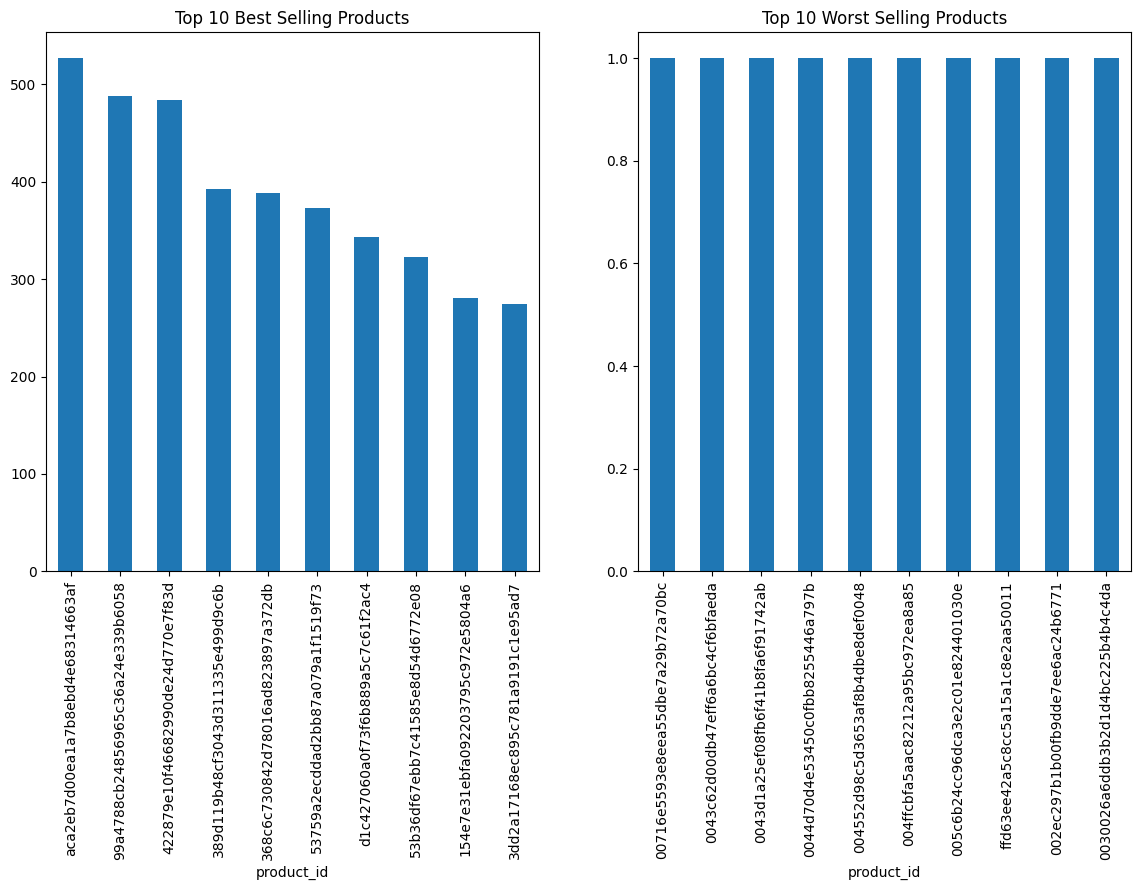

In [109]:
# Produk dengan performa penjualan terbaik dan terburuk
product_sales = order_items_df.groupby('product_id')['order_item_id'].count()
best_selling_products = product_sales.sort_values(ascending=False).head(10)
worst_selling_products = product_sales.sort_values(ascending=True).head(10)

plt.figure(figsize=(14,7))
plt.subplot(1, 2, 1)
best_selling_products.plot(kind='bar', title='Top 10 Best Selling Products')
plt.subplot(1, 2, 2)
worst_selling_products.plot(kind='bar', title='Top 10 Worst Selling Products')
plt.show()

### Pertanyaan 2: Bagaimana pola tren penjualan E-commerce selama periode waktu tertentu?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15328\1517185216.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = orders_df.resample('M').size()


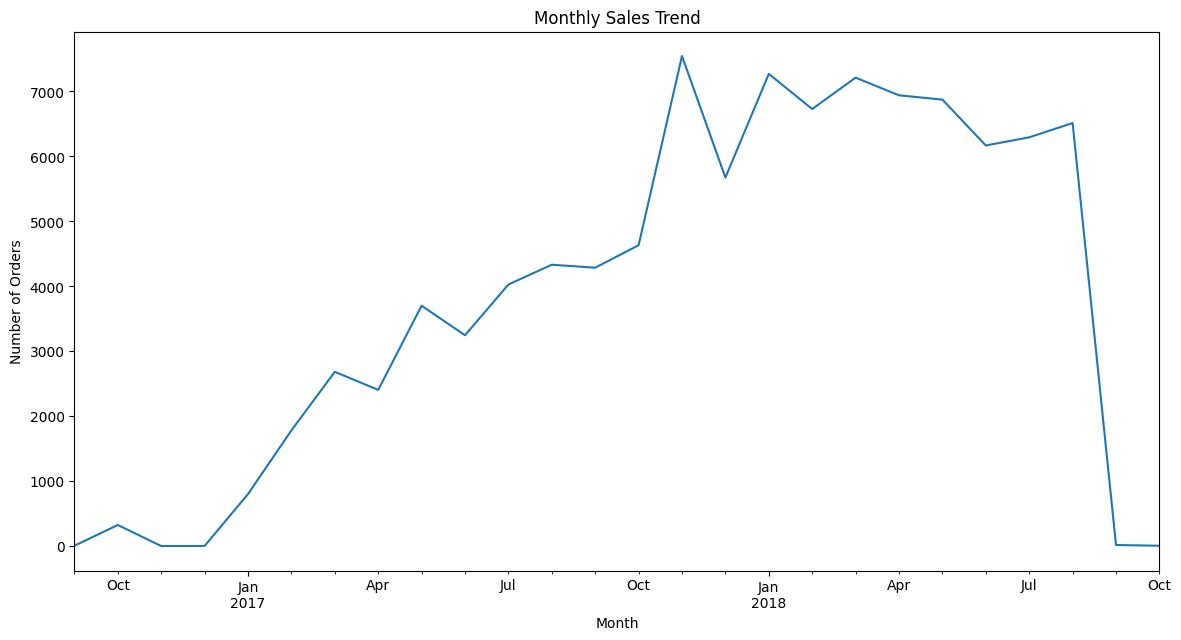

In [110]:
# Pola tren penjualan E-commerce
orders_df.set_index('order_purchase_timestamp', inplace=True)
monthly_sales = orders_df.resample('M').size()
monthly_sales.plot(kind='line', figsize=(14,7))
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

### Pertanyaan 3: Berapa jumlah pendapatan yang dihasilkan oleh E-commerce dalam periode beberapa bulan terakhir?

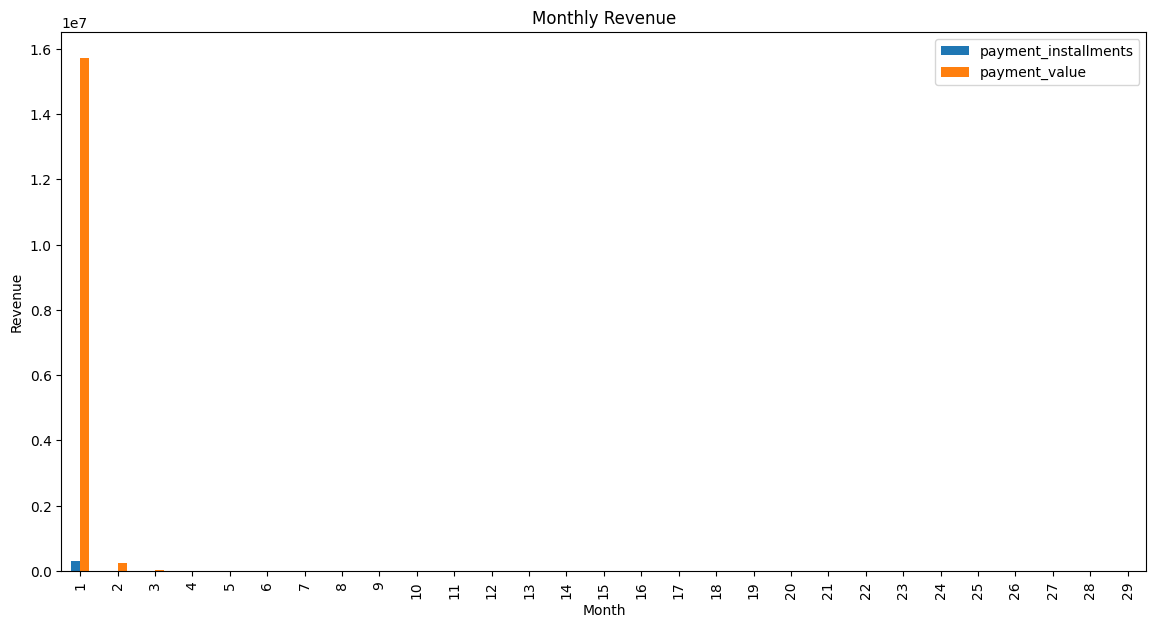

In [111]:
# Jumlah pendapatan yang dihasilkan
order_payments_df['payment_value'] = order_payments_df['payment_value'].astype(float)
monthly_revenue = order_payments_df.groupby(order_payments_df['payment_sequential']).sum()
monthly_revenue.plot(kind='bar', figsize=(14,7))
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

### Pertanyaan 4: Apa saja ulasan dan rating yang diberikan oleh pelanggan kepada E-commerce, dan bagaimana persebarannya?

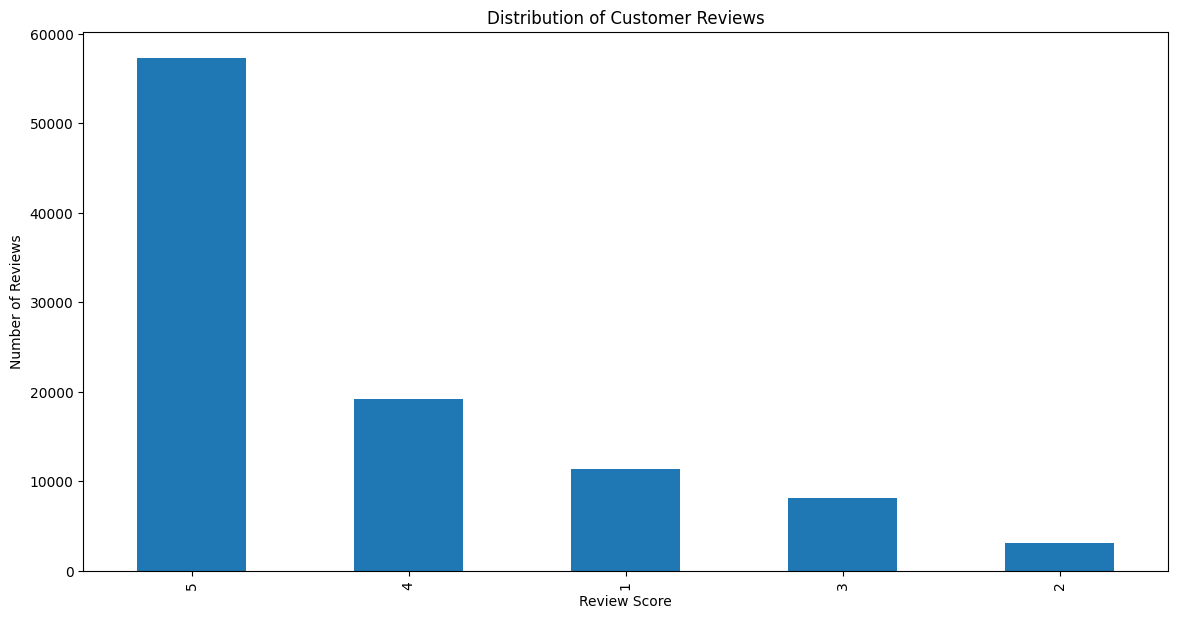

In [112]:
# Ulasan dan rating yang diberikan oleh pelanggan
reviews_distribution = order_reviews_df['review_score'].value_counts()
reviews_distribution.plot(kind='bar', figsize=(14,7))
plt.title('Distribution of Customer Reviews')
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.show()

### Pertanyaan 5: Bagaimana distribusi demografis pelanggan dan apakah ada variasi dalam preferensi pembelian di antara mereka?

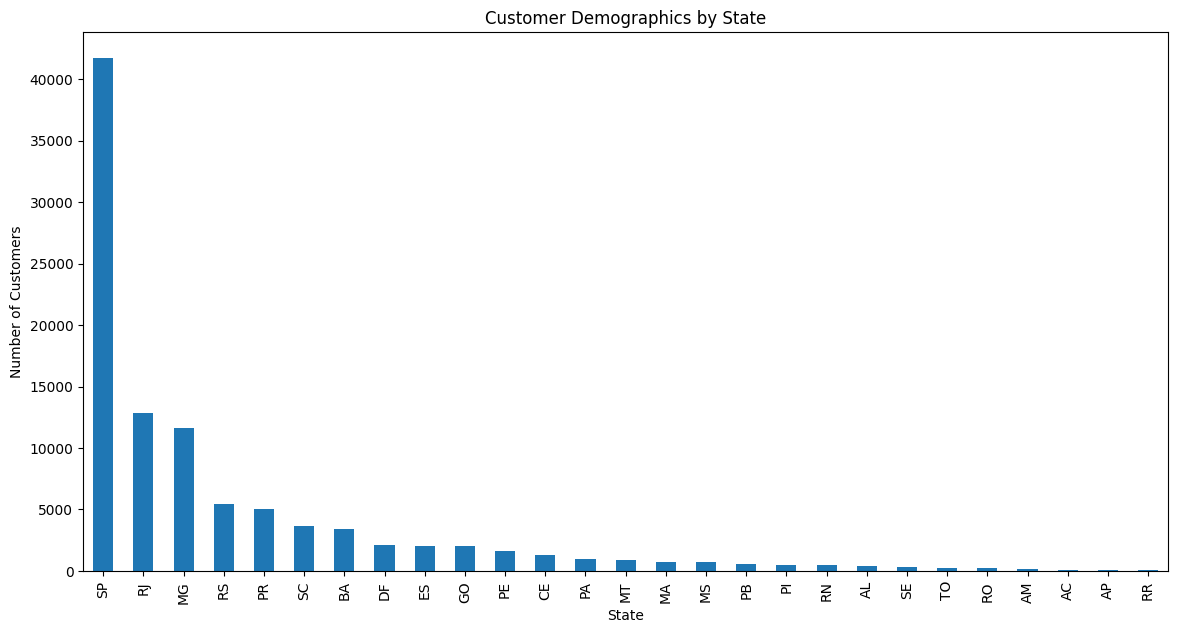

In [113]:
# Distribusi demografis pelanggan
customer_distribution = customers_df['customer_state'].value_counts()
customer_distribution.plot(kind='bar', figsize=(14,7))
plt.title('Customer Demographics by State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.show()

**Insight:**
- **Produk dengan Performa Penjualan Terbaik dan Terburuk**: Visualisasi ini menunjukkan produk-produk yang paling laris dan paling sedikit terjual.
- **Pola Tren Penjualan**: Analisis ini menunjukkan perubahan volume penjualan dari waktu ke waktu, membantu memahami tren musiman atau faktor lain yang mempengaruhi penjualan.
- **Pendapatan Bulanan**: Memahami pendapatan bulanan membantu mengevaluasi kinerja keuangan secara lebih rinci.
- **Distribusi Ulasan Pelanggan**: Analisis ulasan membantu mengidentifikasi kepuasan dan pengalaman pelanggan.
- **Distribusi Demografis Pelanggan**: Memahami distribusi demografis pelanggan membantu menyesuaikan strategi pemasaran dan layanan.

## Analisis Lanjutan (Opsional)

## Conclusion

- **Produk apa saja yang menunjukkan performa penjualan terbaik dan terburuk di E-commerce?**
Produk dengan performa penjualan terbaik menunjukkan bahwa beberapa produk sangat populer di kalangan pelanggan. Produk dengan penjualan terburuk dapat menjadi fokus untuk pengembangan produk lebih lanjut atau strategi pemasaran baru.
- **Bagaimana pola tren penjualan E-commerce selama periode waktu tertentu?**
Pola tren penjualan menunjukkan adanya fluktuasi bulanan dalam volume penjualan. Ini bisa disebabkan oleh faktor musiman, kampanye promosi, atau perilaku pelanggan lainnya.
- **Berapa jumlah pendapatan yang dihasilkan oleh E-commerce dalam periode beberapa bulan terakhir?**
Pendapatan bulanan membantu mengevaluasi kinerja keuangan dan memahami kapan puncak penjualan terjadi.
- **Apa saja ulasan dan rating yang diberikan oleh pelanggan kepada E-commerce, dan bagaimana persebarannya?**
Distribusi ulasan pelanggan menunjukkan tingkat kepuasan dan membantu dalam meningkatkan kualitas produk dan layanan.
- **Bagaimana distribusi demografis pelanggan dan apakah ada variasi dalam preferensi pembelian di antara mereka?**
Distribusi demografis pelanggan membantu dalam menargetkan segmen pasar yang tepat dan menyesuaikan strategi pemasaran.